In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
import time
from collections import OrderedDict

from  utils import sample_from_gen_PatchByPatch
from models import generators
sys.path.append("models/")



In [2]:
def load_G(state_dict_G,netG):
    new_state_dict_G = OrderedDict()

    for k, v in state_dict_G.items():
        if 'module' in k:
            k = k.replace('module.','')
        new_state_dict_G[k] = v
        
    netG.load_state_dict(new_state_dict_G)
    _=netG.eval()
    return netG


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



filename = '../Exps/wall_v2/241_D_patch_dch64_nld4_G_patch2D_gch52_nlg6_npatches3x3_randomcrop192_n_cl1_originalspade_overlappad4_indmaps_overlappadconv_residual_FCG'
#filename = '241_lp_bn_clean/'

checkpoint = torch.load(filename+'/600_50.pth',map_location='cpu')

args = checkpoint['args']
state_dict_G = checkpoint['netG_state_dict']   



#if hasattr(args, 'outer_padding') == False:
#    args.outer_padding = 'replicate'


#netG = generators.ResidualPatchGenerator(z_dim = 128,G_ch = 52,base_res=4,n_layers_G = 6,attention=True,img_ch= 3
#                 ,leak = 0.02,SN = False,type_norm = 'BN',map_dim = 1,
#                 padding_mode = 'local',outer_padding = 'constant',
#                 num_patches_h = 3,num_patches_w=3,padding_size = 1,conv_reduction = 2).to(device)

#netG.load_state_dict(new_state_dict_G)
#_=netG.eval()



netG = load_G(state_dict_G,netG)



(-0.5, 383.5, 383.5, -0.5)

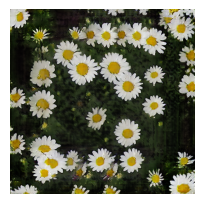

In [14]:
with torch.no_grad():
    img = sample_from_gen_PatchByPatch(netG,num_images=1,device=device).cpu()
    
mult = 0.8
fig2, axes = plt.subplots(1,1,figsize=(mult*3,mult*3))
im_np = img[0].permute(1, 2, 0).numpy()*0.5+0.5
#im_np = np.round(im_np)

plt.imshow(im_np)
axes.axis('off')

1568 5117
Output resolution:  2688 2688
CPU 2.86886


(-0.5, 2687.5, 2687.5, -0.5)

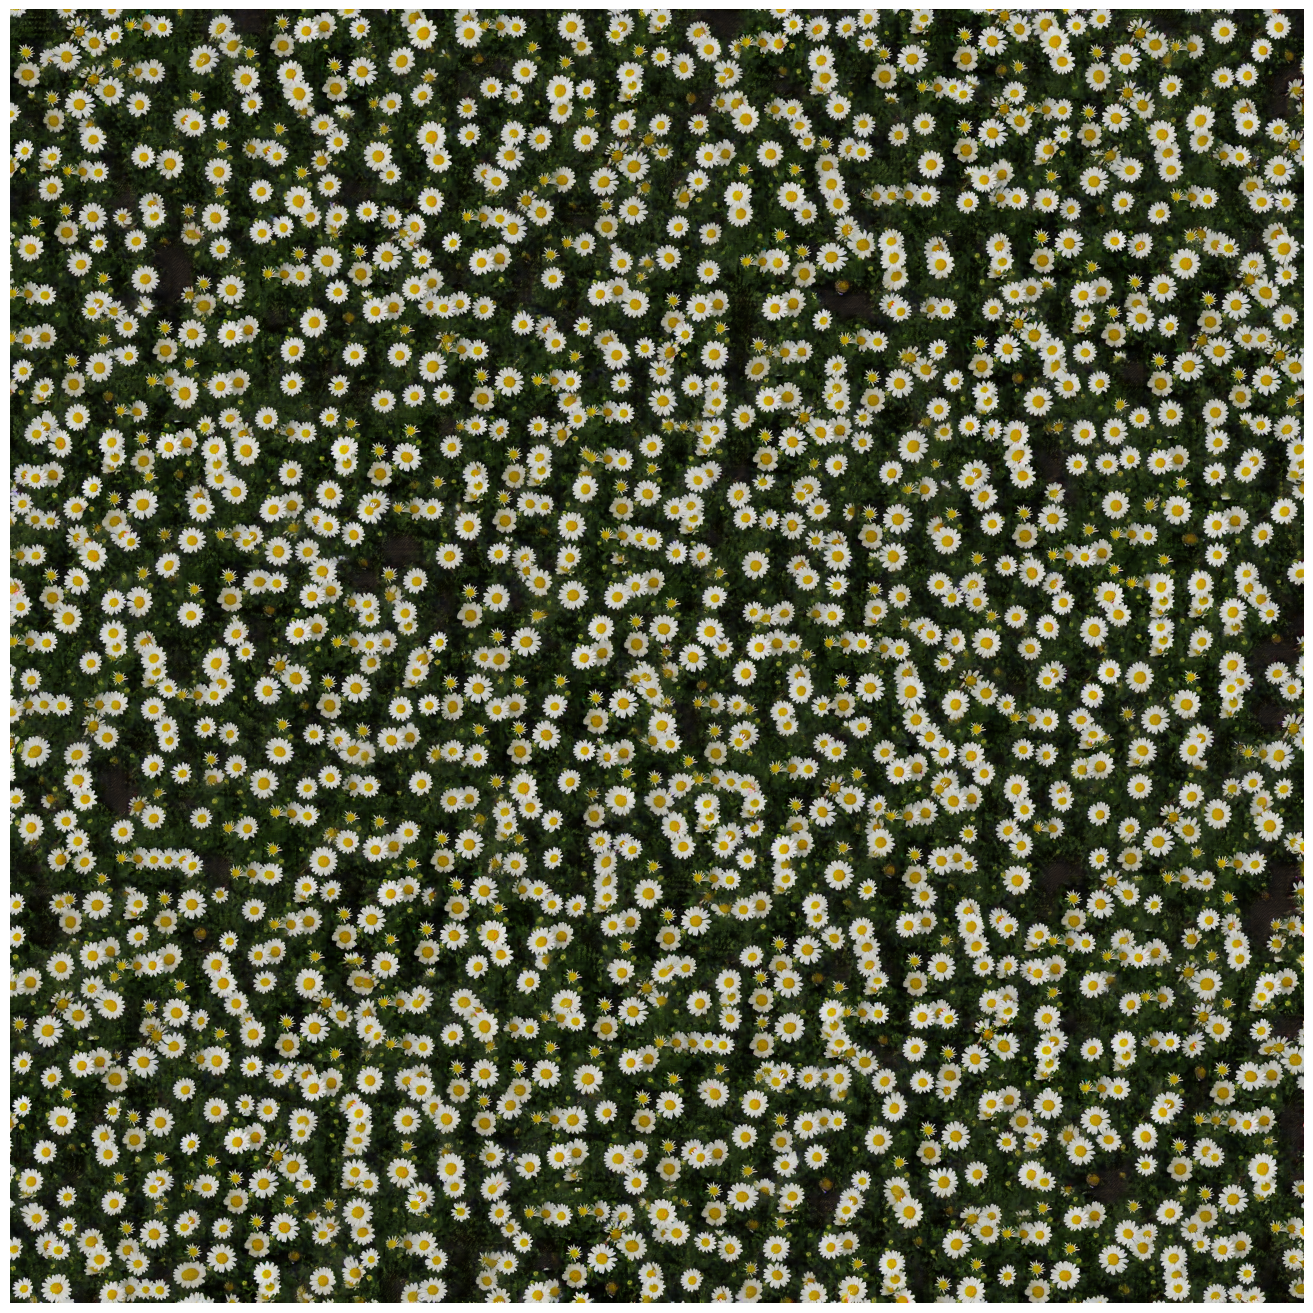

In [16]:

ts = np.random.randint(0,10000)
ns = np.random.randint(0,10000)


print(ts,ns)
torch.manual_seed(ts)
np.random.seed(ns)


# specify the size of the output image by setting the number of patches in both directions
# output resolution = h*gen_res X w*gen_res
h = args.num_patches_h
w = args.num_patches_w
h = 21
w = 21
N = 1
gen_res = (2**(args.n_layers_G-1))*args.base_res
print('Output resolution: ', h*gen_res,w*gen_res)
before = time.time()



with torch.no_grad():
    full_img = utils.scale_2D(args,netG,n_imgs = N,h=h,w=w,device =device)

print(f'CPU {time.time() - before:.5f}') # output: CPU 0.00066

mult = 0.8

#Nx = 1
#Ny = 2
 
 
fig2, axes = plt.subplots(1,1,figsize=(mult*w,mult*h))
im_np = full_img[0].permute(1, 2, 0).numpy()*0.5+0.5
#im_np = np.round(im_np)

plt.imshow(im_np)
axes.axis('off')

#plt.savefig('241_ex.pdf',bbox_inches='tight',pad_inches = 0)